# Quickstart

This notebook will give a brief overview of basic ``chem_mat_data`` functionality related to loading the datasets, visualization of molecules and the training of *graph neural network* models.

In [9]:
import os
from typing import List, Dict, Union

import pandas as pd
import matplotlib.pyplot as plt
from rich.pretty import pprint
from chem_mat_data._typing import GraphDict
from chem_mat_data.main import load_smiles_dataset, load_graph_dataset, load_dataset_metadata
from chem_mat_data.visualization import plot_molecule

plt.style.use('default')

## Raw Datasets

In the ``chem_mat_data`` package, the datasets can either be downloaded in various *raw* formats or directly in a *processed/graph* format. The raw format is a more compressed representation of the elements - usually in the form they were originally published in. It is advised to use the raw format when *not* using graph neural networks, but rather traditional methods such as molecular descriptors or fingerprints.

### SMILES Dataset

One common *raw* dataset format is to provide a list of [SMILES](https://en.wikipedia.org/wiki/Simplified_Molecular_Input_Line_Entry_System) strings annotated with their corresponding target properties. Such a smiles dataset can be retrieved by using the ``load_smiles_dataset`` function and the unique string name of the dataset in question. This function returns a ``pandas.DataFrame`` object containing one column ``"smiles"`` along with one or more additional columns for the target properties.

Subsequently, these SMILES can be further processed into descriptors/fingerprints and used to train a random forest classifier, for example.

In [3]:
data: pd.DataFrame = load_smiles_dataset('clintox')

print(data.head())

                                              smiles  FDA_APPROVED  CT_TOX
0            *C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC             1       0
1  [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...             1       0
2  [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...             1       0
3  [H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...             1       0
4  [H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...             1       0


**Visualizing Molecules.** The package also provides a conventient wrapper function to visualize the molecules using the RDKit Cheminformatics library. To visualizae a molecule onto a matplotlib canvas, use the ``plot_molecule`` function.

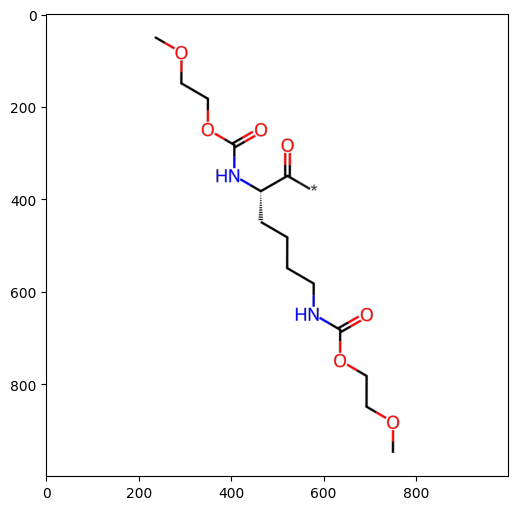

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))

smiles = data['smiles'][0]
node_positions = plot_molecule(
    ax=ax,
    molecule=smiles,
)

## Graph Dataset

Alternative to the *raw* dataset format, the package offers to directly load the pre-processed *graph* dataset format as well, which is recommended when working with downstream graph neural network models. The graph dataset can be loaded by using the ``load_graph_dataset`` function. This function will return a list of dictionary objects that encode the graph structure of the molecules/materials. In this graph representation, each atom is represented as a node and each bond as an edge. Nodes and edges are associated with numeric feature vectors that encode the type of atom/bond, the number of implicit hydrogens, the aromaticity etc.

In [3]:
graphs: List[GraphDict] = load_graph_dataset('clintox')

print(f'number of graphs: {len(graphs)}')

number of graphs: 1480


Each of these graph dictionaries is structured in the following way to encode the graph structure of the molecule:

- ``node_indices``: Integer numpy array of the shape $(V, )$ where $V$ is the number of nodes/atoms and each element represents the unique integer node index.
- ``node_attributes``: Float numpy array of the shape $(V, N)$ where $V$ is the number of nodes/atoms and $N$ is the number of numeric node features associated with each node.
- ``edge_indices``: Integer numpy array of the shape $(E, 2)$ where $E$ is the number of edges/bonds. Each entry represents a node tuple $(i, j)$ where $i, j$ are node indices that are connected by an edge.
- ``edge_attributes``: Float numpy array of the shape $(E, M)$ where $E$ is the number of edges/bonds and $M$ is the number of numeric features associated with each edge.
- ``graph_labels``: Float numpy array of the shape $(P, )$ where $T$ is the number of target property values associated with the graph as a whole.

In [6]:
example_graph = graphs[0]

pprint(example_graph)

{
│   'node_indices': array([0, 1, 2]),
│   'node_attributes': array([[ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    , 32.067 ,  0.    ,  0.    ,  0.    ,
│   │    0.6482,  7.591 ],
│      [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
│   │    0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    , 78.96  ,  0.    ,  0.    ,  0.    ,
│   │   -0.3808,  5.754 ],
│      [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
│   │    1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
│   │    0.    ,  0.    ,  0.    , 32.067 ,  0.    ,  0.    ,  0.    ,
│   │    0.6482,  7.591 ]]),
│   'edge_indices': array([[0, 1],
│      [1, 0],
│      [1, 2],
│      [2, 1]]),
│   'edge_attributes': array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
│      [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
│      [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
│      [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]),
│   'graph_attributes': array([143.8606633]),
│   'graph_labels': array([1, 0]),
│   'graph_repr': [143.8606633]
}

**Plotting Molecules from Graphs.** For convenience, it is also possible to use the ``plot_molecule`` function to plot a molecule from the graph dict representation directly as well.

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
# plot_molecule(
#     ax=ax,
#     molecule=example_graph
# )

## Dataset Metadata

In addition to the actual datasets, it is also possible to load the metadata associated with each dataset by using the ``load_dataset_metadata`` function. This function returns a dictionary object that contains the metadata. This metadata information contains, for example, whether the dataset is a regression or classification task, the number of target properties, the number of elements etc.

In [ ]:
metadata: Dict = load_dataset_metadata('clintox')

pprint(metadata)

{
│   'compounds': 1478,
│   'targets': 2,
│   'target_type': ['Classification'],
│   'tags': ['Smiles', 'Molecules', 'Physiology'],
│   'description': 'Qualitative data of drugs approved by the FDA and those that have failed clinical trials for toxicity reasons.',
│   'raw': ['csv'],
│   'full': True
}